In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df_wildfire = sqlite3.connect('FPA_FOD_20170508.sqlite')
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
table_names = [table[0] for table in table_names]
print("Tables in the database:", table_names,"\n")
table_names.remove('SpatialIndex')
table_names.remove('ElementaryGeometries')
table_names.remove('KNN')
dataframes = {}

# Loop through table names and extract data into DataFrames
for table_name in table_names:
    # Read data from the database and assign it to a DataFrame
    query = f"SELECT * FROM {table_name}"
    dataframes[table_name] = pd.read_sql_query(query, conn)


Tables in the database: ['spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'SpatialIndex', 'ElementaryGeometries', 'KNN', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109'] 



In [4]:
Fires = dataframes['Fires']

In [5]:
Fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [6]:
Fires.shape

(1880465, 39)

In [9]:
print(Fires.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
Fires = Fires.drop(columns=['LOCAL_FIRE_REPORT_ID','FIRE_CODE','FIRE_NAME','ICS_209_INCIDENT_NUMBER','ICS_209_NAME','MTBS_ID','MTBS_FIRE_NAME','MTBS_FIRE_NAME','COMPLEX_NAME'])

In [10]:
Fires =Fires[Fires['STATE'] == 'CA']
Fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,009371,2015,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000366,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000158,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000380,2015,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [11]:
# Fires =Fires[Fires['STATE'] == 'CA']
Fires = Fires.drop(['FOD_ID','OBJECTID','FIRE_YEAR','FPA_ID','NWCG_REPORTING_UNIT_ID','LOCAL_INCIDENT_ID','DISCOVERY_DATE','DISCOVERY_DOY','DISCOVERY_TIME','CONT_DATE','CONT_DOY','CONT_TIME','OWNER_DESCR','FIPS_NAME','STATE','COUNTY','Shape',],axis=1)

In [12]:
Fires = Fires.dropna()

In [13]:
Fires

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE
0,FED,FS-FIRESTAT,FS,Plumas National Forest,0511,Plumas National Forest,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,5.0,063
1,FED,FS-FIRESTAT,FS,Eldorado National Forest,0503,Eldorado National Forest,1.0,Lightning,0.25,A,38.933056,-120.404444,5.0,061
2,FED,FS-FIRESTAT,FS,Eldorado National Forest,0503,Eldorado National Forest,5.0,Debris Burning,0.10,A,38.984167,-120.735556,13.0,017
3,FED,FS-FIRESTAT,FS,Eldorado National Forest,0503,Eldorado National Forest,1.0,Lightning,0.10,A,38.559167,-119.913333,5.0,003
4,FED,FS-FIRESTAT,FS,Eldorado National Forest,0503,Eldorado National Forest,1.0,Lightning,0.10,A,38.559167,-119.933056,5.0,003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,NONFED,ST-NASF,ST/C&L,Amador-El Dorado Unit,CAAEU,Amador-El Dorado Unit,13.0,Missing/Undefined,0.01,A,38.691628,-121.372908,14.0,067
1872301,NONFED,ST-NASF,ST/C&L,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,9.0,Miscellaneous,0.10,A,38.172881,-120.801955,15.0,009
1872302,NONFED,ST-NASF,ST/C&L,Riverside Unit,CARRU,CDF - Riverside Unit,9.0,Miscellaneous,0.10,A,33.919157,-116.882973,14.0,065
1872303,NONFED,ST-NASF,ST/C&L,Fresno-Kings Unit,CAFKU,CDF - Fresno-Kings Unit,5.0,Debris Burning,0.25,A,37.110917,-119.322918,14.0,019


In [14]:
object_columns = Fires.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each object column and apply label encoding
for col in object_columns:
    Fires[col] = label_encoder.fit_transform(Fires[col])

# Display the updated DataFrame
print(Fires)

         SOURCE_SYSTEM_TYPE  SOURCE_SYSTEM  NWCG_REPORTING_AGENCY  \
0                         0              1                      4   
1                         0              1                      4   
2                         0              1                      4   
3                         0              1                      4   
4                         0              1                      4   
...                     ...            ...                    ...   
1872300                   2              4                      7   
1872301                   2              4                      7   
1872302                   2              4                      7   
1872303                   2              4                      7   
1872304                   2              4                      7   

         NWCG_REPORTING_UNIT_NAME  SOURCE_REPORTING_UNIT  \
0                              57                     11   
1                              20                  

In [15]:
X = Fires.drop('STAT_CAUSE_CODE', axis=1)
y = Fires['STAT_CAUSE_CODE']

# model = LogisticRegression(max_iter=1000)
# rfe = RFE(model, n_features_to_select=5)
# X_selected = rfe.fit_transform(X, y)

In [16]:
X

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE
0,0,1,4,57,11,70,7,0.10,0,40.036944,-121.005833,5.0,31
1,0,1,4,20,3,32,6,0.25,0,38.933056,-120.404444,5.0,30
2,0,1,4,20,3,32,3,0.10,0,38.984167,-120.735556,13.0,8
3,0,1,4,20,3,32,6,0.10,0,38.559167,-119.913333,5.0,1
4,0,1,4,20,3,32,6,0.10,0,38.559167,-119.933056,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,2,4,7,0,27,0,8,0.01,0,38.691628,-121.372908,14.0,33
1872301,2,4,7,90,89,112,7,0.10,0,38.172881,-120.801955,15.0,4
1872302,2,4,7,58,72,10,7,0.10,0,33.919157,-116.882973,14.0,32
1872303,2,4,7,22,49,7,3,0.25,0,37.110917,-119.322918,14.0,9


In [17]:
X = X.drop(['LATITUDE','LONGITUDE'],axis=1)

In [18]:

X_new = SelectKBest(chi2, k=8).fit_transform(X, y)


In [19]:
X_new

array([[0.0e+00, 1.0e+00, 5.7e+01, ..., 7.0e+00, 1.0e-01, 5.0e+00],
       [0.0e+00, 1.0e+00, 2.0e+01, ..., 6.0e+00, 2.5e-01, 5.0e+00],
       [0.0e+00, 1.0e+00, 2.0e+01, ..., 3.0e+00, 1.0e-01, 1.3e+01],
       ...,
       [2.0e+00, 4.0e+00, 5.8e+01, ..., 7.0e+00, 1.0e-01, 1.4e+01],
       [2.0e+00, 4.0e+00, 2.2e+01, ..., 3.0e+00, 2.5e-01, 1.4e+01],
       [2.0e+00, 4.0e+00, 4.5e+01, ..., 7.0e+00, 1.0e-02, 1.4e+01]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9947532236549578
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1936
         2.0       1.00      1.00      1.00      1483
         3.0       0.98      0.99      0.99       319
         4.0       0.97      0.97      0.97       575
         5.0       0.99      0.99      0.99       768
         6.0       0.91      0.83      0.87        24
         7.0       0.99      1.00      0.99       967
         8.0       0.99      0.96      0.97       398
         9.0       1.00      1.00      1.00      2747
        10.0       0.00      0.00      0.00         6
        11.0       0.96      0.98      0.97       130
        12.0       0.00      0.00      0.00         6
        13.0       1.00      1.00      1.00      1886

    accuracy                           0.99     11245
   macro avg       0.83      0.83      0.83     11245
weighted avg       0.99      0.99      0.99     11245



C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [22]:
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1936
         2.0       1.00      1.00      1.00      1483
         3.0       1.00      1.00      1.00       319
         4.0       1.00      1.00      1.00       575
         5.0       1.00      1.00      1.00       768
         6.0       1.00      1.00      1.00        24
         7.0       1.00      1.00      1.00       967
         8.0       1.00      1.00      1.00       398
         9.0       1.00      1.00      1.00      2747
        10.0       1.00      1.00      1.00         6
        11.0       1.00      1.00      1.00       130
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00      1886

    accuracy                           1.00     11245
   macro avg       1.00      1.00      1.00     11245
weighted avg       1.00      1.00      1.00     11245



In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.31969764339706536
Classification Report:
              precision    recall  f1-score   support

         1.0       0.42      0.70      0.53      1936
         2.0       0.00      0.00      0.00      1483
         3.0       0.00      0.00      0.00       319
         4.0       0.00      0.00      0.00       575
         5.0       0.00      0.00      0.00       768
         6.0       0.00      0.00      0.00        24
         7.0       0.00      0.00      0.00       967
         8.0       0.00      0.00      0.00       398
         9.0       0.30      0.35      0.32      2747
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00       130
        12.0       0.00      0.00      0.00         6
        13.0       0.27      0.68      0.38      1886

    accuracy                           0.32     11245
   macro avg       0.08      0.13      0.09     11245
weighted avg       0.19      0.32      0.23     11245



C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:146

In [29]:
fires = Fires[["OBJECTID",'SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM',"FIRE_YEAR",'DISCOVERY_DATE',
               'DISCOVERY_DOY','DISCOVERY_TIME', 'STAT_CAUSE_DESCR','CONT_DATE',
               'CONT_DOY', 'CONT_TIME','FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE','LONGITUDE', 
               'OWNER_CODE', 'OWNER_DESCR','STATE','COUNTY','FIPS_CODE', 'FIPS_NAME']]
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FED,FS-FIRESTAT,2005,2453403.5,33,1300,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas
1,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,NONFED,ST-CACDF,2015,2457291.5,269,1726,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None
1880461,1880462,NONFED,ST-CACDF,2015,2457300.5,278,0126,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None
1880462,1880463,NONFED,ST-CACDF,2015,2457144.5,122,2052,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None
1880463,1880464,NONFED,ST-CACDF,2015,2457309.5,287,2309,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None


In [4]:
#from here


In [30]:
fires.isnull().sum() 

OBJECTID                   0
SOURCE_SYSTEM_TYPE         0
SOURCE_SYSTEM              0
FIRE_YEAR                  0
DISCOVERY_DATE             0
DISCOVERY_DOY              0
DISCOVERY_TIME        882638
STAT_CAUSE_DESCR           0
CONT_DATE             891531
CONT_DOY              891531
CONT_TIME             972173
FIRE_SIZE                  0
FIRE_SIZE_CLASS            0
LATITUDE                   0
LONGITUDE                  0
OWNER_CODE                 0
OWNER_DESCR                0
STATE                      0
COUNTY                678148
FIPS_CODE             678148
FIPS_NAME             678148
dtype: int64

In [31]:
fires = fires.dropna()
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FED,FS-FIRESTAT,2005,2453403.5,33,1300,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas
1,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872298,1872299,NONFED,ST-NASF,2015,2457367.5,345,1936,Missing/Undefined,2457367.5,345.0,1953,0.02,A,33.709175,-116.179773,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside
1872299,1872300,NONFED,ST-NASF,2015,2457323.5,301,0758,Miscellaneous,2457323.5,301.0,1445,0.01,A,40.476117,-123.943617,14.0,MISSING/NOT SPECIFIED,CA,HUMBOLDT,023,Humboldt
1872301,1872302,NONFED,ST-NASF,2015,2457316.5,294,0356,Miscellaneous,2457316.5,294.0,0415,0.10,A,38.172881,-120.801955,15.0,UNDEFINED FEDERAL,CA,CALAVERAS,009,Calaveras
1872302,1872303,NONFED,ST-NASF,2015,2457353.5,331,0349,Miscellaneous,2457353.5,331.0,0359,0.10,A,33.919157,-116.882973,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside


In [32]:
fires = fires[fires["STAT_CAUSE_DESCR"]!="Missing/Undefined"]
fires = fires[fires["STAT_CAUSE_DESCR"]!="Miscellaneous"]
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
1,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine
5,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872290,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer
1872291,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside
1872292,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte
1872293,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta


In [33]:
fires["DISCOVERY_HOUR"]=fires["DISCOVERY_TIME"].astype("str").str[0:-2].astype(int)
fires["DISCOVERY_MINUTE"]=fires["DISCOVERY_TIME"].astype("str").str[-2:].astype(int)
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_HOUR,DISCOVERY_MINUTE
1,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,8,45
2,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,19,21
3,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,16,0
4,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,16,0
5,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872290,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer,15,23
1872291,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,17,22
1872292,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte,17,2
1872293,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta,18,20


In [34]:
fires["CONT_HOUR"]=fires["CONT_TIME"].astype("str").str[0:-2].astype(int)
fires["CONT_MINUTE"]=fires["CONT_TIME"].astype("str").str[-2:].astype(int)
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_HOUR,CONT_MINUTE
1,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,8,45,15,30
2,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,19,21,20,24
3,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,16,0,14,0
4,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,16,0,12,0
5,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,18,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872290,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer,15,23,15,33
1872291,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,17,22,17,45
1872292,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte,17,2,17,44
1872293,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta,18,20,19,4


In [35]:
fires["DURATION"] = 1440*(fires["CONT_DATE"]-fires["DISCOVERY_DATE"])+60*(fires["CONT_HOUR"] - fires["DISCOVERY_HOUR"])+(fires["CONT_MINUTE"] - fires["DISCOVERY_MINUTE"])
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_HOUR,CONT_MINUTE,DURATION
1,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,8,45,15,30,405.0
2,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,19,21,20,24,63.0
3,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,16,0,14,0,7080.0
4,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,16,0,12,0,6960.0
5,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,18,0,16,0,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872290,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer,15,23,15,33,10.0
1872291,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,17,22,17,45,23.0
1872292,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte,17,2,17,44,42.0
1872293,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta,18,20,19,4,44.0


In [37]:
tmp=fires.groupby(["STATE"]).sum()
tmp["STATE_CODE"]=np.arange(0,50)

tmp1=tmp["STATE_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["STATE"])
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_HOUR,CONT_MINUTE,DURATION,STATE_CODE_x,STATE_CODE_y
0,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,8,45,15,30,405.0,4,4
1,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,19,21,20,24,63.0,4,4
2,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,16,0,14,0,7080.0,4,4
3,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,16,0,12,0,6960.0,4,4
4,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,18,0,16,0,1320.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer,15,23,15,33,10.0,4,4
451893,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,17,22,17,45,23.0,4,4
451894,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte,17,2,17,44,42.0,4,4
451895,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta,18,20,19,4,44.0,4,4


In [38]:
tmp=fires.groupby(["COUNTY"]).sum()
tmp["COUNTY_CODE"]=np.arange(0,2404)

tmp1=tmp["COUNTY_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["COUNTY"])
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_HOUR,CONT_MINUTE,DURATION,STATE_CODE_x,STATE_CODE_y,COUNTY_CODE
0,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,8,45,15,30,405.0,4,4,178
1,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,19,21,20,24,63.0,4,4,96
2,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,16,0,14,0,7080.0,4,4,142
3,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,16,0,12,0,6960.0,4,4,142
4,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,18,0,16,0,1320.0,4,4,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer,15,23,15,33,10.0,4,4,1708
451893,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,17,22,17,45,23.0,4,4,1823
451894,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte,17,2,17,44,42.0,4,4,332
451895,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta,18,20,19,4,44.0,4,4,1927


In [44]:
tmp=fires.groupby(["SOURCE_SYSTEM"]).sum()
tmp["SOURCE_SYSTEM_CODE"]=np.arange(0,16)

tmp1=tmp["SOURCE_SYSTEM_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["SOURCE_SYSTEM"])
fires

KeyboardInterrupt: 

In [39]:
tmp=fires.groupby(["STAT_CAUSE_DESCR"]).sum()
tmp["STAT_CAUSE_CODE"]=np.arange(0,11)

tmp1=tmp["STAT_CAUSE_CODE"]
tmp1=tmp1.reset_index()

fires=pd.merge(fires,tmp1,how="left",on=["STAT_CAUSE_DESCR"])
fires

,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_HOUR,CONT_MINUTE,DURATION,STATE_CODE_x,STATE_CODE_y,COUNTY_CODE,STAT_CAUSE_CODE
0,2,FED,FS-FIRESTAT,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,8,45,15,30,405.0,4,4,178,6
1,3,FED,FS-FIRESTAT,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,19,21,20,24,63.0,4,4,96,3
2,4,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,16,0,14,0,7080.0,4,4,142,6
3,5,FED,FS-FIRESTAT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,16,0,12,0,6960.0,4,4,142,6
4,6,FED,FS-FIRESTAT,2004,2453186.5,182,1800,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,18,0,16,0,1320.0,4,4,166,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,1872291,NONFED,ST-NASF,2015,2457340.5,318,1523,Debris Burning,2457340.5,318.0,1533,0.05,A,38.845417,-121.157081,14.0,MISSING/NOT SPECIFIED,CA,PLACER,061,Placer,15,23,15,33,10.0,4,4,1708,3
451893,1872292,NONFED,ST-NASF,2015,2457345.5,323,1722,Arson,2457345.5,323.0,1745,0.01,A,33.769263,-117.240453,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,17,22,17,45,23.0,4,4,1823,0
451894,1872293,NONFED,ST-NASF,2015,2457298.5,276,1702,Debris Burning,2457298.5,276.0,1744,1.00,B,39.392473,-121.678615,14.0,MISSING/NOT SPECIFIED,CA,BUTTE,007,Butte,17,2,17,44,42.0,4,4,332,3
451895,1872294,NONFED,ST-NASF,2015,2457310.5,288,1820,Children,2457310.5,288.0,1904,0.10,A,40.605000,-122.460717,14.0,MISSING/NOT SPECIFIED,CA,SHASTA,089,Shasta,18,20,19,4,44.0,4,4,1927,2


In [42]:
fires["FIPS_CODE"] = fires["FIPS_CODE"].astype(int)

In [43]:
correlation = fires[["OBJECTID","SOURCE_SYSTEM_CODE","FIRE_YEAR",'DISCOVERY_DOY','STAT_CAUSE_CODE', "DISCOVERY_HOUR",
               "DISCOVERY_MINUTE",'CONT_DOY', "CONT_HOUR","CONT_MINUTE",'FIRE_SIZE', 'LATITUDE','LONGITUDE', 
               'OWNER_CODE', 'STATE_CODE',"COUNTY_CODE",'FIPS_CODE',"DURATION"]].corr().round(3)
correlation

KeyError: "['SOURCE_SYSTEM_CODE', 'STATE_CODE'] not in index"

<AxesSubplot:>

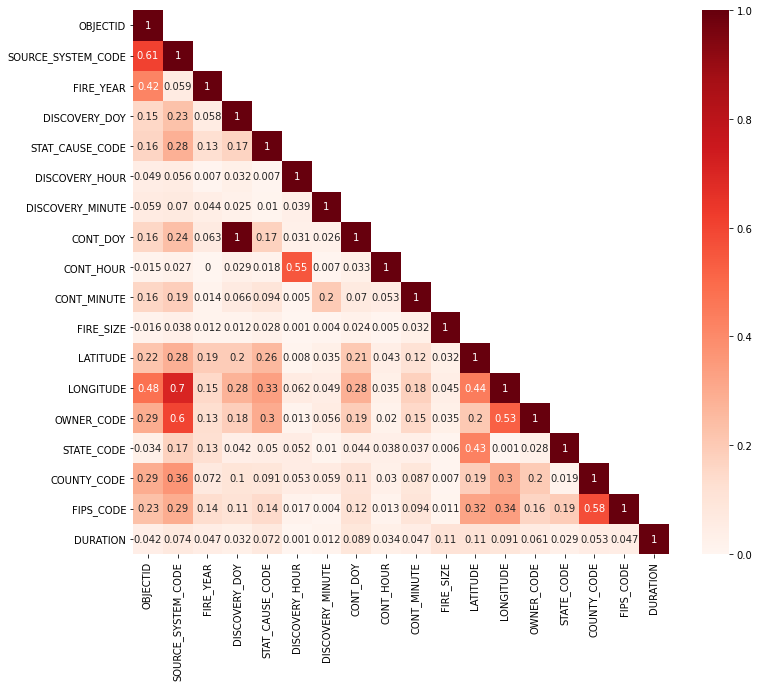

In [96]:
plt.figure(figsize=(12,10))
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask),1)] = True

sns.heatmap(data=correlation.abs(), annot=True, cmap=plt.cm.Reds, mask = mask)

In [97]:
X = fires[["OBJECTID","SOURCE_SYSTEM_CODE","FIRE_YEAR",'DISCOVERY_DOY',"DISCOVERY_HOUR","DISCOVERY_MINUTE",
               'CONT_DOY', "CONT_HOUR","CONT_MINUTE",'FIRE_SIZE', 'LATITUDE','LONGITUDE', 
               'OWNER_CODE', 'STATE_CODE',
           "COUNTY_CODE",'FIPS_CODE',"DURATION"]]
y = fires["STAT_CAUSE_CODE"]
X

,OBJECTID,SOURCE_SYSTEM_CODE,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_DOY,CONT_HOUR,CONT_MINUTE,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,STATE_CODE,COUNTY_CODE,FIPS_CODE,DURATION
0,2,1,2004,133,8,45,133.0,15,30,0.25,38.933056,-120.404444,5.0,4,178,61,405.0
1,3,1,2004,152,19,21,152.0,20,24,0.10,38.984167,-120.735556,13.0,4,96,17,63.0
2,4,1,2004,180,16,0,185.0,14,0,0.10,38.559167,-119.913333,5.0,4,142,3,7080.0
3,5,1,2004,180,16,0,185.0,12,0,0.10,38.559167,-119.933056,5.0,4,142,3,6960.0
4,6,1,2004,182,18,0,183.0,16,0,0.10,38.635278,-120.103611,5.0,4,166,5,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,1872291,10,2015,318,15,23,318.0,15,33,0.05,38.845417,-121.157081,14.0,4,1708,61,10.0
451893,1872292,10,2015,323,17,22,323.0,17,45,0.01,33.769263,-117.240453,14.0,4,1823,65,23.0
451894,1872293,10,2015,276,17,2,276.0,17,44,1.00,39.392473,-121.678615,14.0,4,332,7,42.0
451895,1872294,10,2015,288,18,20,288.0,19,4,0.10,40.605000,-122.460717,14.0,4,1927,89,44.0


In [98]:
enc = OneHotEncoder()
state=enc.fit_transform(np.array(fires["STATE_CODE"]).reshape(-1,1))
state=pd.DataFrame(state.toarray())
state

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451893,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451894,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
enc2 = OneHotEncoder()
owner=enc2.fit_transform(np.array(fires["OWNER_CODE"]).reshape(-1,1))
owner=pd.DataFrame(owner.toarray())
owner

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
enc3 = OneHotEncoder()
source=enc3.fit_transform(np.array(fires["SOURCE_SYSTEM_CODE"]).reshape(-1,1))
source=pd.DataFrame(source.toarray())
source

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [101]:
X = pd.concat([X, state,owner,source], axis=1)
X

,OBJECTID,SOURCE_SYSTEM_CODE,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_DOY,CONT_HOUR,CONT_MINUTE,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,STATE_CODE,COUNTY_CODE,FIPS_CODE,DURATION,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,1,2004,133,8,45,133.0,15,30,0.25,38.933056,-120.404444,5.0,4,178,61,405.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,2004,152,19,21,152.0,20,24,0.10,38.984167,-120.735556,13.0,4,96,17,63.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,2004,180,16,0,185.0,14,0,0.10,38.559167,-119.913333,5.0,4,142,3,7080.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,2004,180,16,0,185.0,12,0,0.10,38.559167,-119.933056,5.0,4,142,3,6960.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1,2004,182,18,0,183.0,16,0,0.10,38.635278,-120.103611,5.0,4,166,5,1320.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,1872291,10,2015,318,15,23,318.0,15,33,0.05,38.845417,-121.157081,14.0,4,1708,61,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451893,1872292,10,2015,323,17,22,323.0,17,45,0.01,33.769263,-117.240453,14.0,4,1823,65,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451894,1872293,10,2015,276,17,2,276.0,17,44,1.00,39.392473,-121.678615,14.0,4,332,7,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [103]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 0.6901084310688206
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     18660
           1       0.68      0.47      0.56      5692
           2       0.54      0.07      0.12      2453
           3       0.65      0.82      0.72     27870
           4       0.55      0.40      0.46      6638
           5       0.65      0.17      0.27       553
           6       0.83      0.90      0.86     23077
           7       0.50      0.12      0.19      1066
           8       0.86      0.29      0.44      1152
           9       0.47      0.17      0.25      2952
          10       0.67      0.01      0.03       267

    accuracy                           0.69     90380
   macro avg       0.64      0.37      0.41     90380
weighted avg       0.68      0.69      0.67     90380



In [109]:
X_new = SelectKBest(chi2, k=8).fit_transform(X)

TypeError: fit() missing 1 required positional argument: 'y'

In [110]:
X

,OBJECTID,SOURCE_SYSTEM_CODE,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_HOUR,DISCOVERY_MINUTE,CONT_DOY,CONT_HOUR,CONT_MINUTE,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,STATE_CODE,COUNTY_CODE,FIPS_CODE,DURATION,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,1,2004,133,8,45,133.0,15,30,0.25,38.933056,-120.404444,5.0,4,178,61,405.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,2004,152,19,21,152.0,20,24,0.10,38.984167,-120.735556,13.0,4,96,17,63.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,2004,180,16,0,185.0,14,0,0.10,38.559167,-119.913333,5.0,4,142,3,7080.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,2004,180,16,0,185.0,12,0,0.10,38.559167,-119.933056,5.0,4,142,3,6960.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1,2004,182,18,0,183.0,16,0,0.10,38.635278,-120.103611,5.0,4,166,5,1320.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451892,1872291,10,2015,318,15,23,318.0,15,33,0.05,38.845417,-121.157081,14.0,4,1708,61,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451893,1872292,10,2015,323,17,22,323.0,17,45,0.01,33.769263,-117.240453,14.0,4,1823,65,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
451894,1872293,10,2015,276,17,2,276.0,17,44,1.00,39.392473,-121.678615,14.0,4,332,7,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [118]:
X_new = X.drop(['LATITUDE','LONGITUDE'],axis=1)
X_new = SelectKBest(chi2, k=40).fit_transform(X_new, y)

X_new

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[2.000000e+00, 1.000000e+00, 1.330000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.000000e+00, 1.000000e+00, 1.520000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.000000e+00, 1.000000e+00, 1.800000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.872293e+06, 1.000000e+01, 2.760000e+02, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.872294e+06, 1.000000e+01, 2.880000e+02, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.872296e+06, 1.000000e+01, 3.100000e+02, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42,shuffle=True)

In [120]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6688094711219297
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     18660
           1       0.64      0.45      0.53      5692
           2       0.46      0.07      0.13      2453
           3       0.63      0.80      0.71     27870
           4       0.52      0.39      0.45      6638
           5       0.50      0.15      0.23       553
           6       0.82      0.89      0.85     23077
           7       0.49      0.13      0.21      1066
           8       0.76      0.24      0.37      1152
           9       0.42      0.16      0.23      2952
          10       0.42      0.03      0.06       267

    accuracy                           0.67     90380
   macro avg       0.57      0.36      0.40     90380
weighted avg       0.65      0.67      0.65     90380



In [ ]:
X_new = X.drop(['LATITUDE','LONGITUDE'],axis=1)
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
X_selected = rfe.fit_transform(X_new, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
